In [24]:
import sys
sys.path.insert(0, '../basic codes')

import class_magnesium_not_drop_na
from class_magnesium_not_drop_na import *

In [25]:
#fold = '../main_datasets/'
fold = '../input files/rna-ion-step2/'
file_ = 'set_minresol_A_7.csv'

In [26]:
dat = pd.read_csv(fold+file_, sep='\t')
dat.head()

,pdb_chain,xray,resol,chainlen,protein,alpham2,betam2,gammam2,deltam2,epsilonm2,...,atomO2p,atomO3p,atomO4,atomO4p,atomO5p,atomO6,atomOP1,atomOP2,atomOP3,mg
0,1b23.cif1_R,1,2.6,74,1,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
1,1b23.cif1_R,1,2.6,74,1,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2,1b23.cif1_R,1,2.6,74,1,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
3,1b23.cif1_R,1,2.6,74,1,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
4,1b23.cif1_R,1,2.6,74,1,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0


In [27]:
chain = {'1drz.cif1': ['B'],
'1duh.cif1': ['A'],
'1ehz.cif1': ['A'],
'1evv.cif1': ['A'],
'1f27.cif1': ['A','B'],
'1fir.cif1': ['A'],
'1gid.cif1': ['A','B'],
'1hr2.cif1': ['A','B'],
'1i9v.cif1': ['A'],
'1jj2.cif1': ['9'],
'301d.cif1': ['A','B'],
'354d.cif1': ['A','B'],
'357d.cif1': ['A','B','C'],
'364d.cif1': ['A','B','C'],
'429d.cif1': ['A','B','C','D'],
'430d.cif1': ['A'],
'462d.cif1': ['A','B']}
dt_new = pd.DataFrame()

In [28]:
counter = [0,0,0]
not_found = []
for item in chain.items():
    for value in chain[item[0]]:
        counter[0] += 1
        chain_part = '_'.join([item[0], value])
        if np.sum(dat['pdb_chain'] == chain_part) != 0:
            dt_new = dt_new.append(dat.loc[dat['pdb_chain'] == chain_part])
            counter[1] += 1
            print(chain_part)
        else:
            not_found.append(chain_part)
        #    print(chain_part)
            counter[2] += 1
print('Всего было добавлено %.2f цепей. Не найдено %.2f цепей.'%(counter[1], counter[2]))

364d.cif1_A
364d.cif1_B
364d.cif1_C
1fir.cif1_A
1f27.cif1_A
301d.cif1_A
301d.cif1_B
354d.cif1_A
354d.cif1_B
430d.cif1_A
1evv.cif1_A
1drz.cif1_B
1ehz.cif1_A
Всего было добавлено 13.00 цепей. Не найдено 17.00 цепей.


In [26]:
dt_new.shape

(4643, 385)

In [29]:
fold = '../main_datasets/validation/'

print('Всего цепей - %d штук.\n' % counter[0])

print('%s ->>> %s'%(file_, str(dat.shape)))
print('Всего было добавлено %d цепей. Не найдено %d цепей. \n'%(counter[1], counter[2]))

for filename in os.listdir(fold):
    dt = pd.read_csv(fold+filename, sep='\t')
    print('%s ->>> %s'%(filename, str(dt.shape)))
    counter = [0,0,0]
    to_remove = []

    for chain_part in not_found:
            counter[0] += 1
           # print(counter[0], end=' ')
            if np.sum(dt['pdb_chain'] == chain_part) != 0:
                dt_new = dt_new.append(dt.loc[dt['pdb_chain'] == chain_part])
                counter[1] += 1
                to_remove.append(chain_part)
                print(chain_part)
           #     print(len(not_found), chain_part)
            else:
              #  print(chain_part)
                counter[2] += 1
    print('Всего было добавлено %d цепей. Не найдено %d цепей. \n'%(counter[1], counter[2]))
    [not_found.remove(i) for i in to_remove];
    
print('Не найдена цепь - %s'%not_found[0])

Всего цепей - 30 штук.

set_minresol_A_7.csv ->>> (963372, 385)
Всего было добавлено 13 цепей. Не найдено 17 цепей. 

set_d_A_7.csv ->>> (4567, 386)
Всего было добавлено 0 цепей. Не найдено 17 цепей. 

set_minresol-minus-d_A_7.csv ->>> (237969, 386)
Всего было добавлено 0 цепей. Не найдено 17 цепей. 

set_minresol200-minus-d_A_7.csv ->>> (188856, 386)
Всего было добавлено 0 цепей. Не найдено 17 цепей. 

set_val-minus-minresol_A_7.csv ->>> (11127, 386)
1i9v.cif1_A
1hr2.cif1_A
1hr2.cif1_B
1gid.cif1_A
1gid.cif1_B
1duh.cif1_A
429d.cif1_A
429d.cif1_B
429d.cif1_C
429d.cif1_D
1jj2.cif1_9
462d.cif1_A
462d.cif1_B
357d.cif1_A
357d.cif1_B
357d.cif1_C
Всего было добавлено 16 цепей. Не найдено 1 цепей. 

set_val2_A_7.csv ->>> (1294, 386)
Всего было добавлено 0 цепей. Не найдено 1 цепей. 

Не найдена цепь - 1f27.cif1_B


In [33]:
dt = pd.read_csv(fold+'set_val-minus-minresol_A_7.csv', sep='\t')
print(np.sum(np.array(dt['pdb_chain'])=='357d.cif1_A'))
if ('DSSR' in dt.columns):
            dt.drop('DSSR', axis=1, inplace=True)            
data = dt.dropna()
np.sum(np.array(data['pdb_chain'])=='357d.cif1_A')

98


34

In [28]:
dt_new.to_csv('Feature_chains.csv', sep='\t', index=False)

### Test the dataset

In [1]:
import sys
sys.path.insert(0, '../basic codes')

import class_magnesium_not_drop_na
from class_magnesium_not_drop_na import *

In [2]:
fold = ''
file_ = 'Feature_chains.csv'

In [3]:
def plot_one_plot(plot_elements):
    [eval(plot_string) for plot_string in plot_elements]

In [4]:
m = Magnesium(file_, fold = fold,colours = ['#f6c35b', '#929292'], with_groups = False, 
              model = RandomForestClassifier(n_estimators=200, n_jobs=-1, criterion='gini', max_depth = 50, min_samples_leaf = 1))

C:\Users\tikho\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2821: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [5]:
angles = ['sszp','v1','v2', 'v3', 'v4', 'e-z', 'phase-angle','thetap','p',
          'SI', 'SII', 'SIII', 'SIV', 'SV','SVII', 'SIX', 'SX', 'SXIII', 'SXIV', 'SXV', 'SXVII', 'SXVIII',
          'SXXI', 'SXXV','SXXVI', 'SXXVII', 'cHS', 'cHH', 'dp']          
#           ['tm', 'SXVI', 'SXXII', 'SXXIII', 'SXXIX', 'cWH'?, 'cWS', 'cSS', 'atomO6'  'SVI'
#     'p', 'phase-angle', 'e-z','tm', 'sszp', 'etap', 'etapp', 'splay', 'thetap', 'thetapp']
angles = np.ravel([[''.join([i,j]) for i in angles] for j in ['m2', 'm1', '', '1', '2']]).tolist()
features = deepcopy(m.features)
[print(i) for i in ['atomN', 'atomOP3', 'chainlen','resol','xray','mg']+angles if i not in features]
[features.remove(i) for i in ['atomN', 'atomOP3', 'chainlen','resol','xray','mg']+angles];
print('%d features were deleted.' %len(['atomN', 'atomOP3', 'chainlen','resol','xray','mg']+angles))

features = deepcopy(m.features)
[features.remove(i) for i in ['mg']];

151 features were deleted.


In [6]:
x = np.array(m.data[features])
y = m.y

m.trained_model = RandomForestClassifier(n_estimators=200, 
                                                        n_jobs=-1, 
                                                        criterion='gini', 
                                                        max_depth = 26, 
                                                        max_features = 0.5,
                                                        min_samples_leaf = 10)

In [17]:
m.groups=='357d.cif1_A'

34

In [23]:
data = pd.read_table(fold+file_)
data.loc[m.groups=='357d.cif1_A']#['DSSR']

C:\Users\tikho\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DSSR,SI,SI1,SI2,SII,SII1,SII2,SIII,SIII1,SIII2,...,v4m1,v4m2,wtlen,wtnum,xray,zeta,zeta1,zeta2,zetam1,zetam2
4215,NaN,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,...,22.5,25.9,4,1,1,-73.6,-76.3,-72.3,-71.6,-49.3
4216,NaN,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,...,22.5,25.9,4,1,1,-73.6,-76.3,-72.3,-71.6,-49.3
4217,NaN,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,...,22.5,25.9,4,1,1,-73.6,-76.3,-72.3,-71.6,-49.3
4218,NaN,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,...,22.5,25.9,4,1,1,-73.6,-76.3,-72.3,-71.6,-49.3
4219,NaN,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,...,22.5,25.9,4,1,1,-73.6,-76.3,-72.3,-71.6,-49.3
4220,NaN,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,...,22.5,25.9,4,1,1,-73.6,-76.3,-72.3,-71.6,-49.3
4221,NaN,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,...,22.5,25.9,4,1,1,-73.6,-76.3,-72.3,-71.6,-49.3
4222,NaN,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,...,22.5,25.9,4,1,1,-73.6,-76.3,-72.3,-71.6,-49.3
4223,NaN,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,...,23.9,22.5,4,2,1,-76.3,-72.3,-56.7,-73.6,-71.6
4224,NaN,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,...,23.9,22.5,4,2,1,-76.3,-72.3,-56.7,-73.6,-71.6


In [20]:
data['pdb_chain']

0        1ehz.cif1_A
1        1ehz.cif1_A
2        1ehz.cif1_A
3        1ehz.cif1_A
4        1ehz.cif1_A
5        1ehz.cif1_A
6        1ehz.cif1_A
7        1ehz.cif1_A
8        1ehz.cif1_A
9        1ehz.cif1_A
10       1ehz.cif1_A
11       1ehz.cif1_A
12       1ehz.cif1_A
13       1ehz.cif1_A
14       1ehz.cif1_A
15       1ehz.cif1_A
16       1ehz.cif1_A
17       1ehz.cif1_A
18       1ehz.cif1_A
19       1ehz.cif1_A
20       1ehz.cif1_A
21       1ehz.cif1_A
22       1ehz.cif1_A
23       1ehz.cif1_A
24       1ehz.cif1_A
25       1ehz.cif1_A
26       1ehz.cif1_A
27       1ehz.cif1_A
28       1ehz.cif1_A
29       1ehz.cif1_A
            ...     
15740    429d.cif1_D
15741    429d.cif1_D
15742    429d.cif1_D
15743    429d.cif1_D
15744    429d.cif1_D
15745    429d.cif1_D
15746    429d.cif1_D
15747    429d.cif1_D
15748    429d.cif1_D
15749    429d.cif1_D
15750    429d.cif1_D
15751    429d.cif1_D
15752    429d.cif1_D
15753    429d.cif1_D
15754    429d.cif1_D
15755    429d.cif1_D
15756    429d

In [11]:
plots_test = []
plots_train = []
data_train = []
data_test = []

n = np.unique(m.groups).shape[0]
tested_chains = []

gss = GroupShuffleSplit(n_splits = n, test_size = 1, random_state = 0)
rus = RandomUnderSampler(ratio = 'auto', random_state=42)
trained_model = m.model
splitted = gss.split(x, y, groups = m.groups)
iterator = tqdm_notebook(enumerate(np.unique(m.groups)), desc = "Splits", leave = True) if tqdm else splitted            
for i,group in iterator:   
    print(i,group)
    try:
        test_index = m.groups == group
        train_index = m.groups != group
        x_train, y_train = rus.fit_sample(x[train_index], y[train_index])
        shuffle_inds = np.arange(x_train.shape[0]).tolist()
        np.random.shuffle(shuffle_inds)
        x_train, y_train = x_train[shuffle_inds], y_train[shuffle_inds]
        print(x_train.shape)
        x_test, y_test = x[test_index], y[test_index]
        trained_model.fit(x_train, y_train)
        data_test.append(m.predict(x_test, y_test, trained_model))
        data_train.append(m.predict(x_train, y_train, trained_model))
        plots_test.append(data_test[-1]['plots']['prob_density'])
        plots_train.append(data_train[-1]['plots']['prob_density'])
        tested_chains.append(group)
  #  try:
    except Exception as e: 
        print('Error!')
        print(e)
        pass

0 1drz.cif1_B
(5316, 383)
1 1duh.cif1_A
(5380, 383)

2 1ehz.cif1_A
(5176, 383)
3 1evv.cif1_A
(5116, 383)
4 1f27.cif1_A
(5290, 383)
5 1fir.cif1_A
(5392, 383)
6 1gid.cif1_A
(4832, 383)
7 1gid.cif1_B
(4818, 383)
8 1hr2.cif1_A
(4370, 383)
9 1hr2.cif1_B
(4594, 383)
10 1i9v.cif1_A
(5278, 383)
11 1jj2.cif1_9
(5322, 383)
12 301d.cif1_A
(5348, 383)
13 301d.cif1_B
(5346, 383)
14 354d.cif1_A
(5350, 383)
15 354d.cif1_B
(5342, 383)
16 357d.cif1_A
(5388, 383)
17 357d.cif1_B
(5286, 383)
18 357d.cif1_C
(5292, 383)
19 364d.cif1_A
(5382, 383)
20 364d.cif1_B
(5318, 383)
21 364d.cif1_C
(5140, 383)
22 429d.cif1_A
(5380, 383)
23 429d.cif1_B
(5378, 383)
24 429d.cif1_C
(5406, 383)
Error!
`dataset` input should have multiple elements.
25 429d.cif1_D
(5406, 383)
Error!
`dataset` input should have multiple elements.
26 430d.cif1_A
(5220, 383)
27 462d.cif1_A
(5278, 383)
28 462d.cif1_B
(5224, 383)



C:\Users\tikho\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


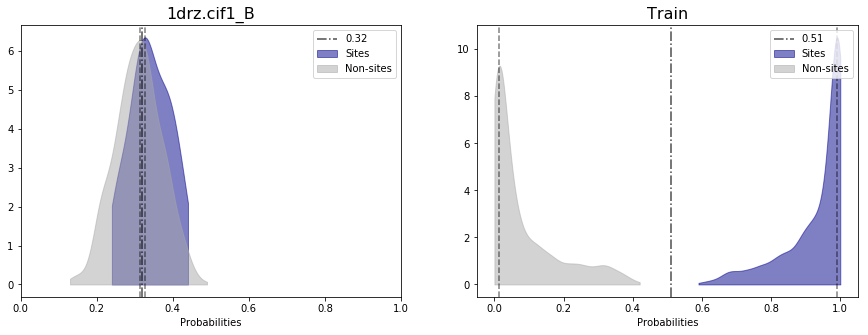

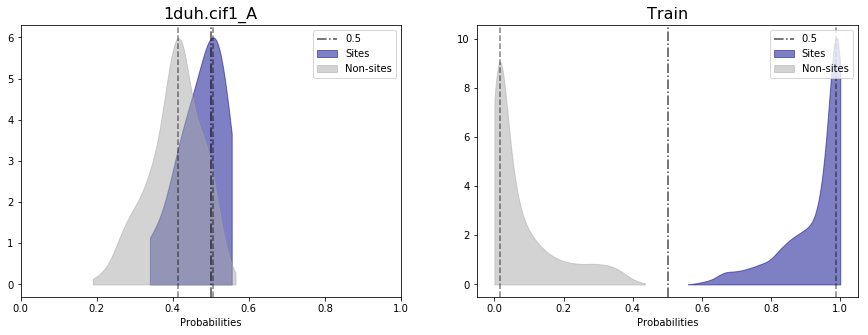

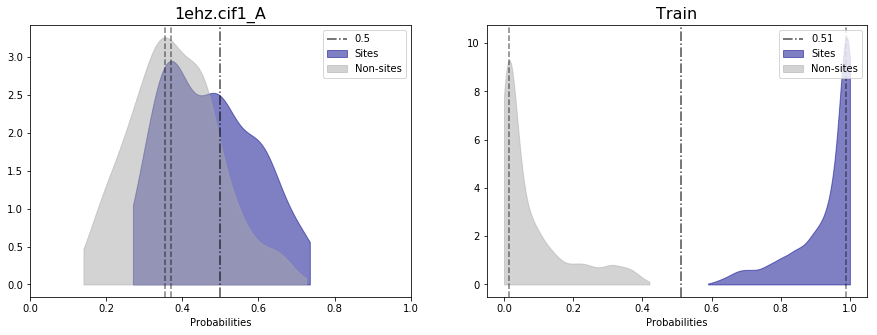

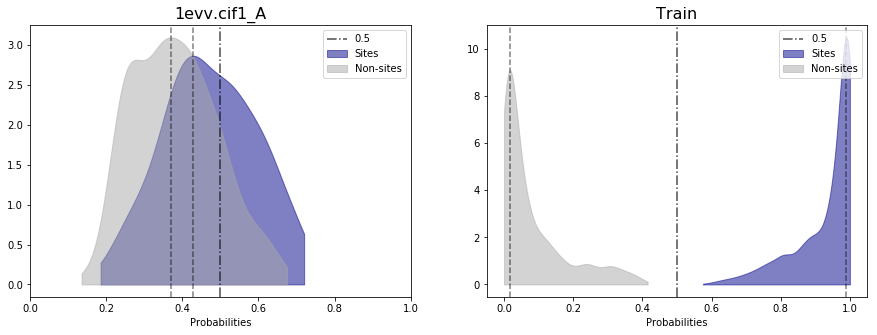

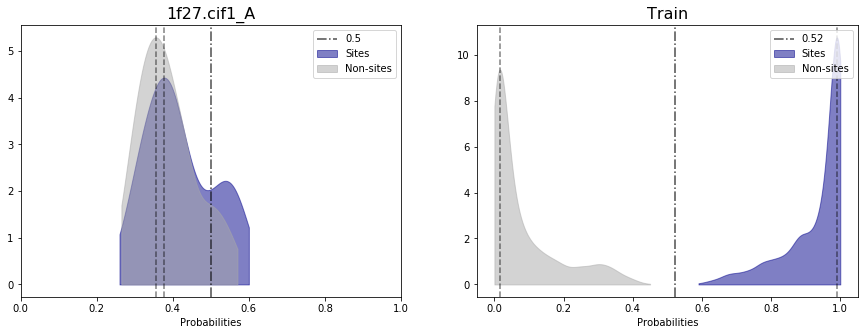

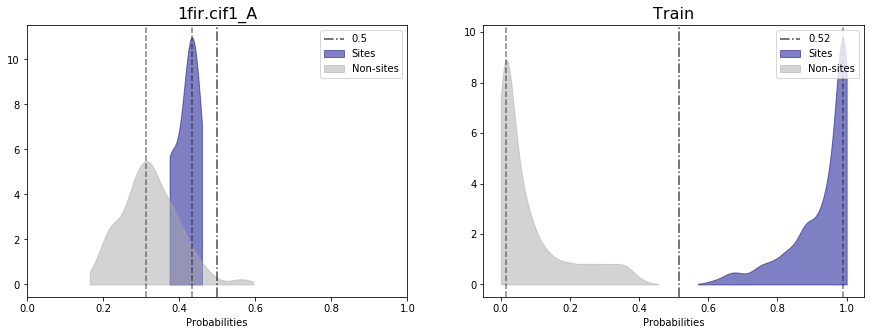

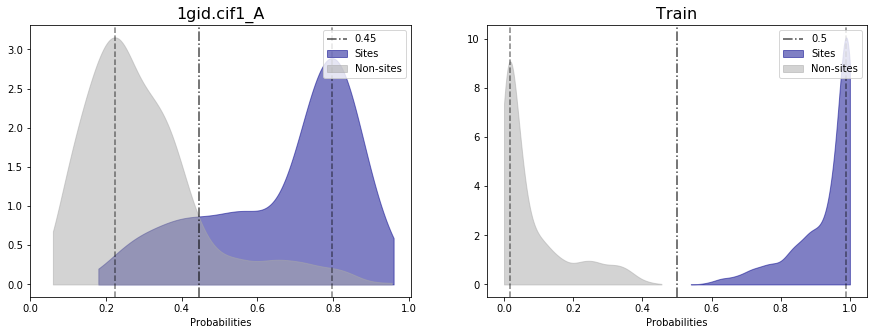

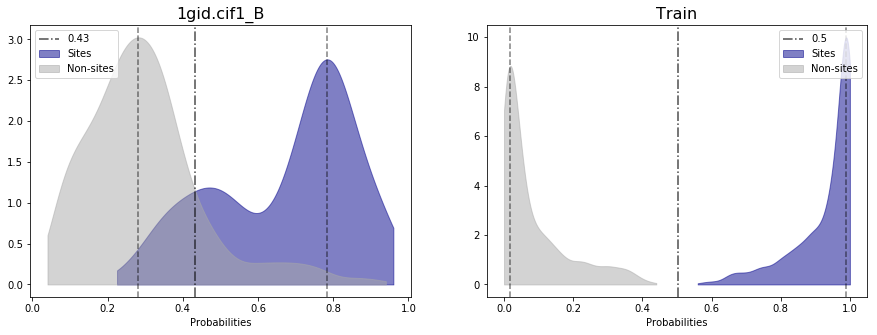

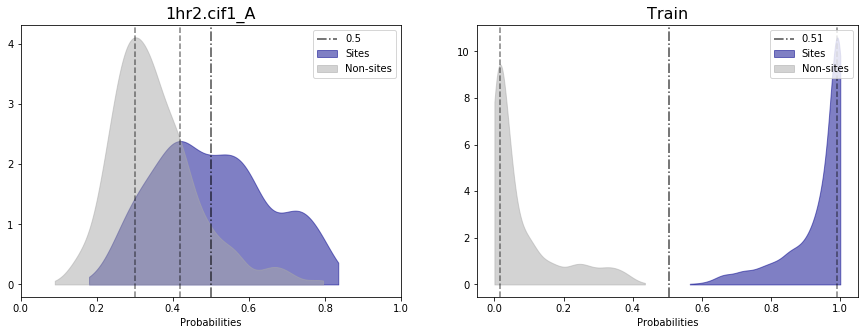

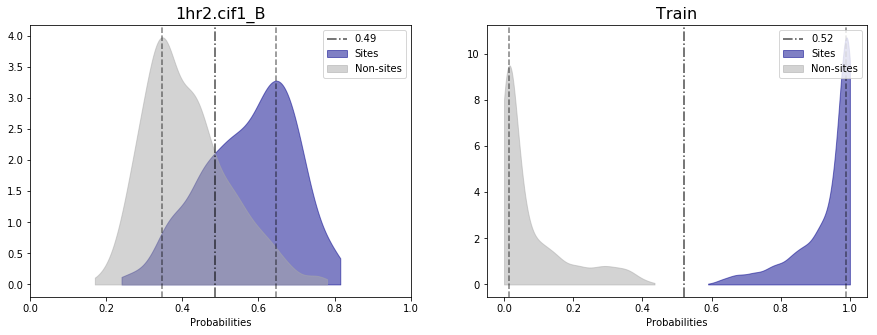

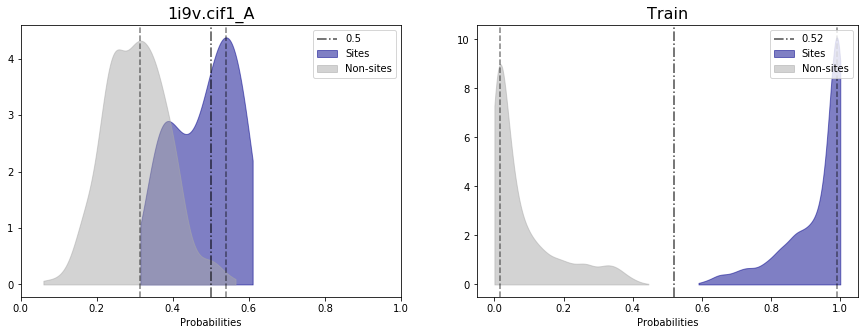

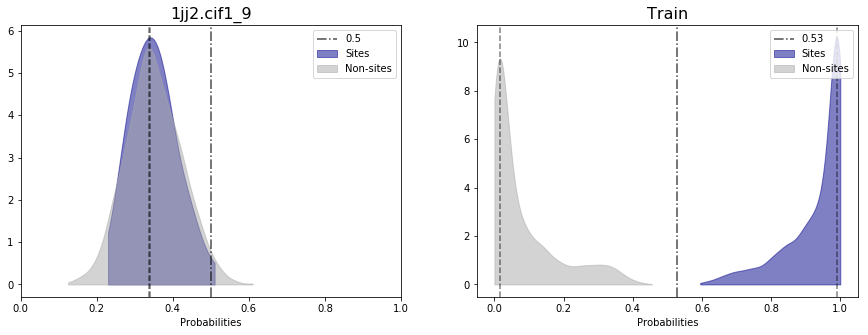

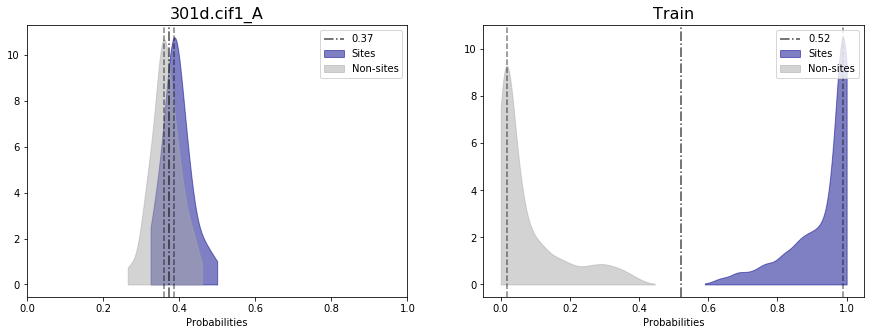

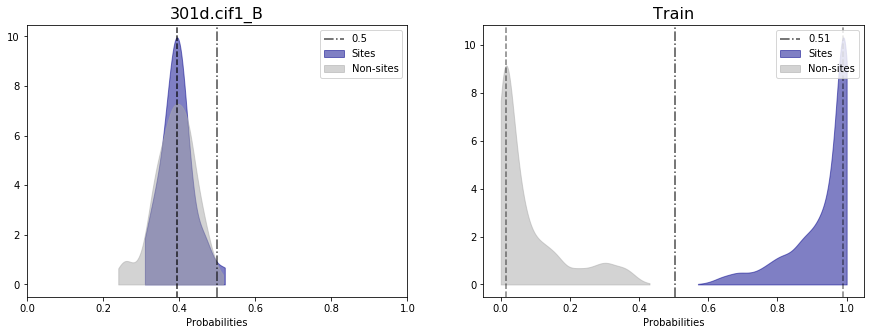

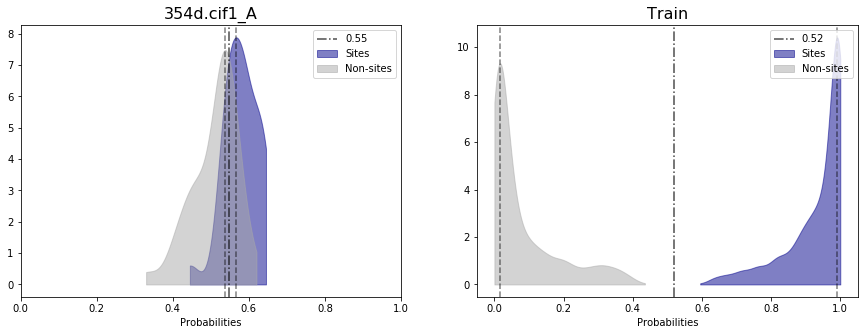

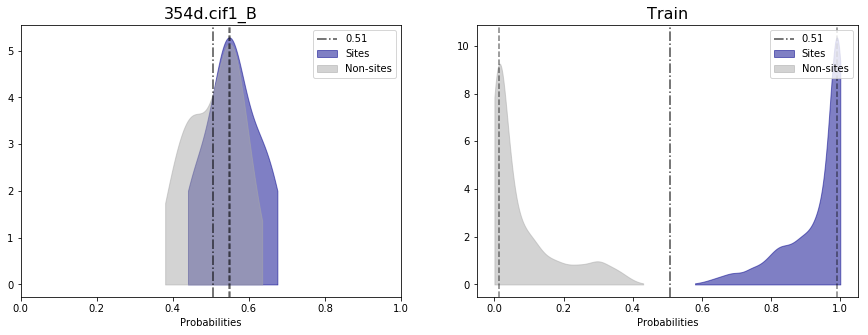

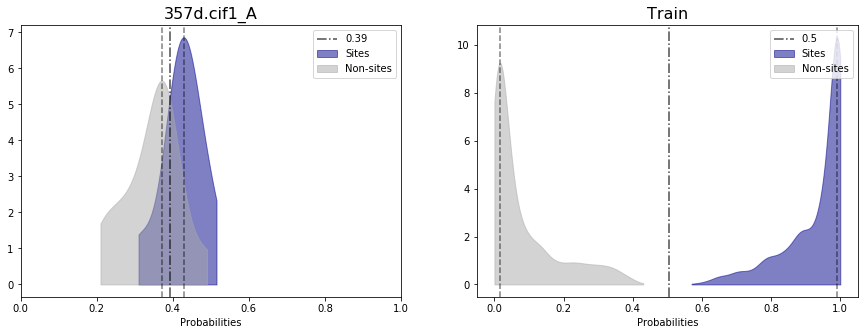

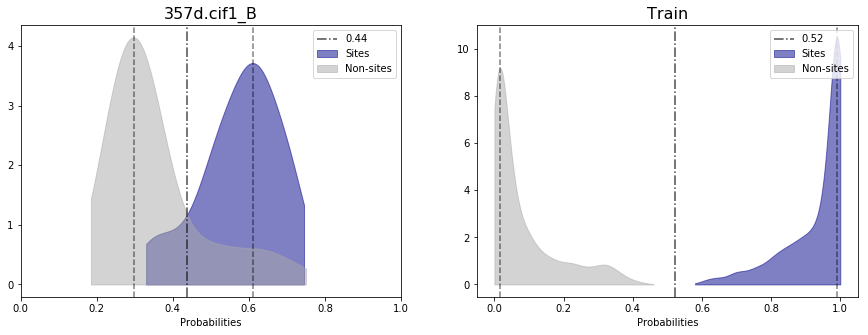

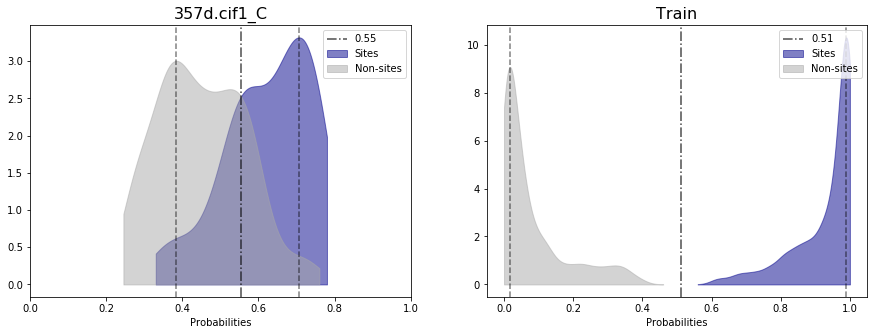

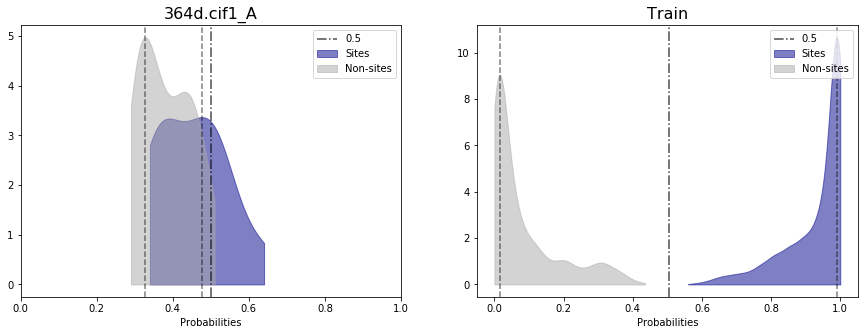

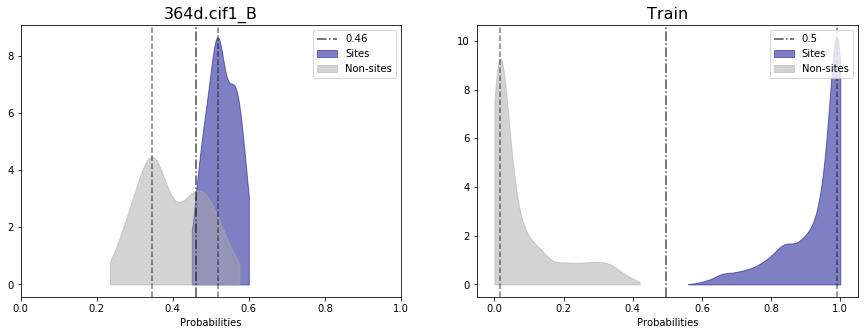

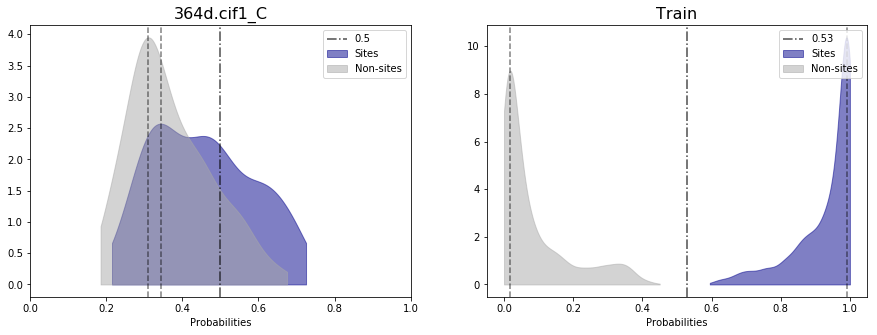

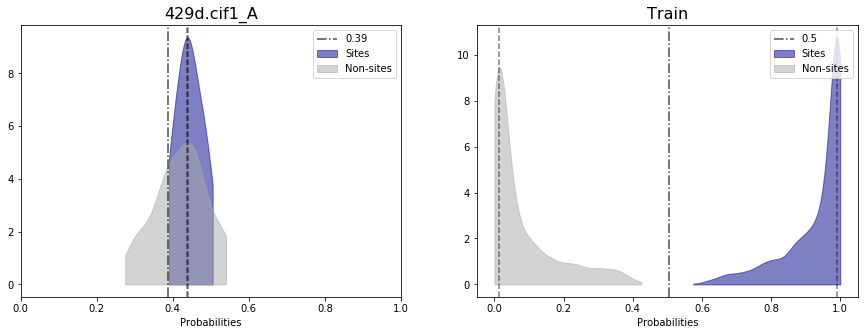

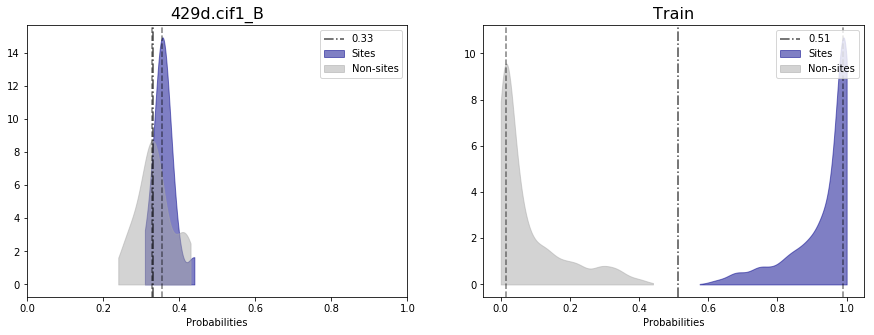

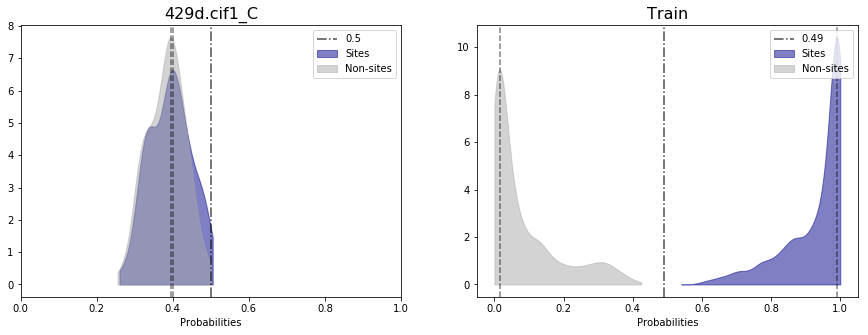

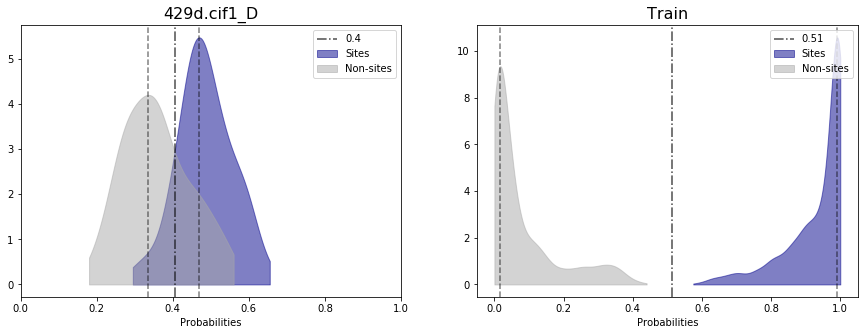

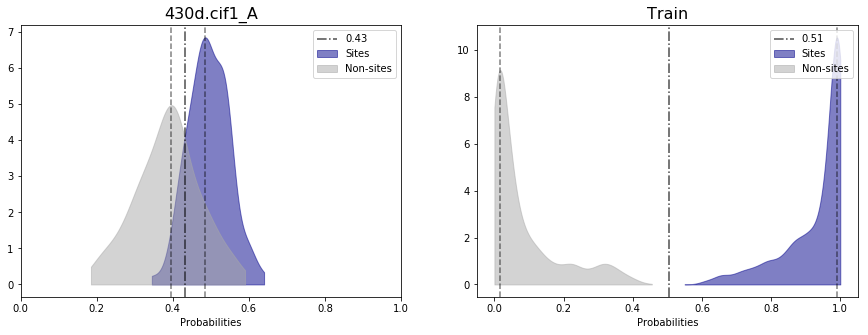

In [8]:
plt.rcParams['figure.facecolor'] = 'white'
for i,(test, train) in enumerate(zip(plots_test,plots_train)):   
    fig = plt.figure(figsize=(15, 5))
    test[-2] = "plt.title('%s', fontsize=16)"%np.unique(m.groups)[i]
    train[-2] = "plt.title('Train', fontsize=16)"
    fig.add_subplot(1,2,1)
    plot_one_plot(test)
    fig.add_subplot(1,2,2)
    plot_one_plot(train)
    plt.savefig('outputs/REAL_without_indexes_mf_05_ml_sqrt_%d.png'%i)

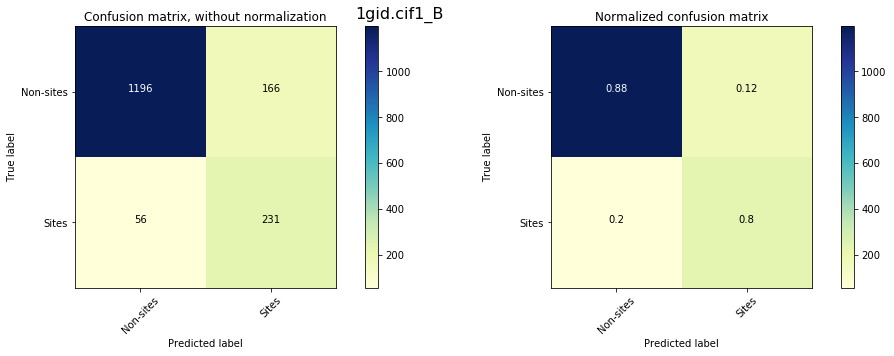

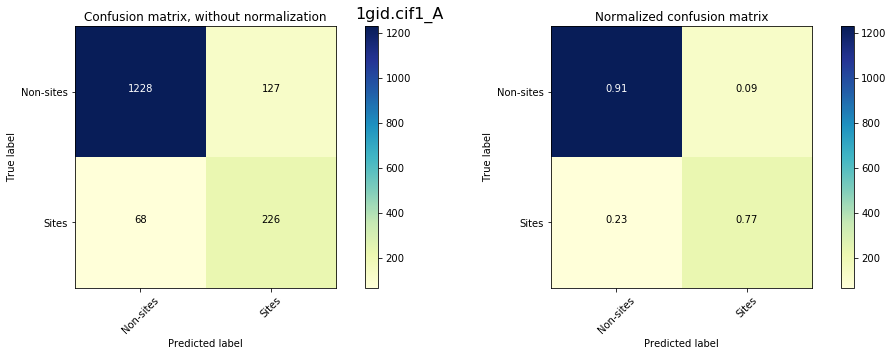

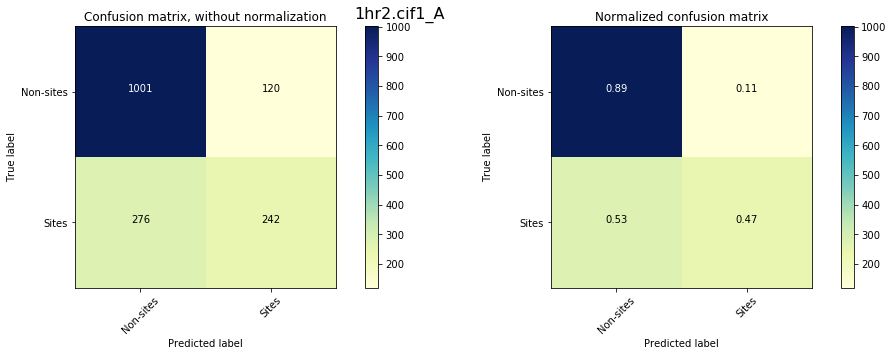

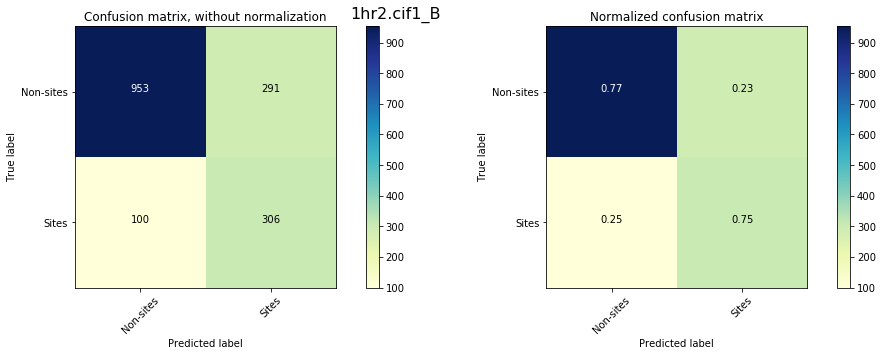

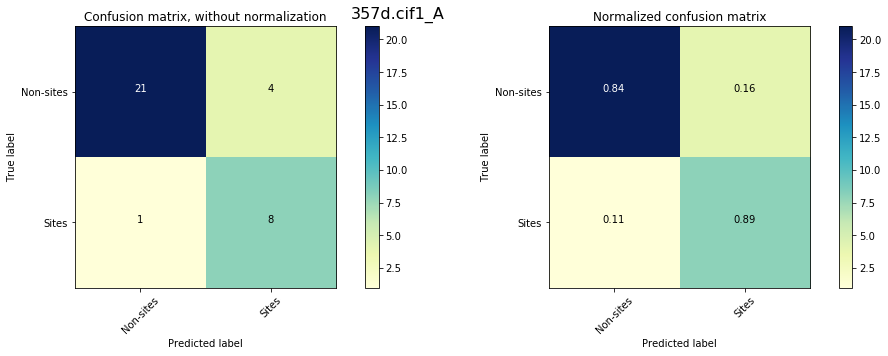

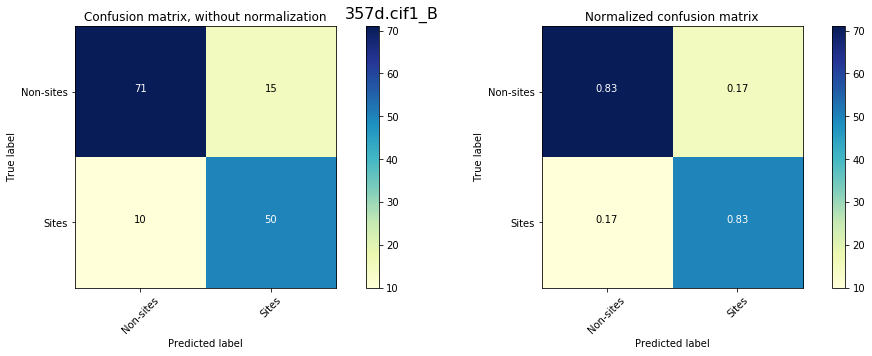

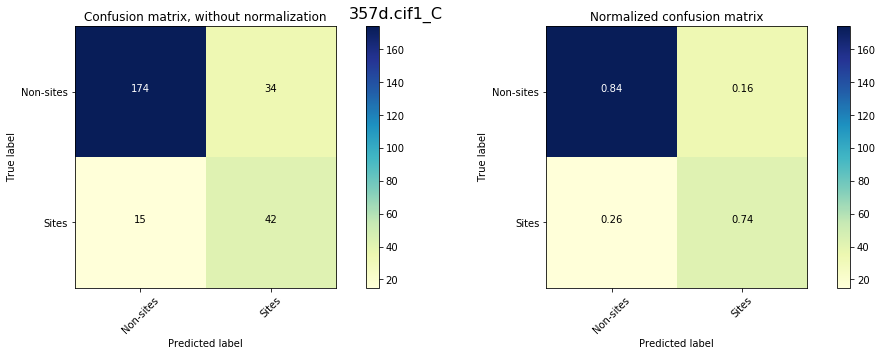

In [41]:
inds = [6,7,8,9, 16, 17, 18]
names = ['1gid.cif1_B', '1gid.cif1_A', '1hr2.cif1_A', '1hr2.cif1_B', '357d.cif1_A', '357d.cif1_B', '357d.cif1_C', '1i9v']

plt.rcParams['figure.facecolor'] = 'white'
for j,i in enumerate(inds):   
    test = data_test[i]['plots']['cnf']
    test_normed =  data_test[i]['plots']['cnf_normed']
   # train = data_train[i]['plots']['cnf']
    fig = plt.figure(figsize=(15, 5))
    plt.suptitle(names[j], fontsize = 16)
    #test[-2] = "plt.title('%s', fontsize=16)"%np.unique(m.groups)[i]
    #train[-2] = "plt.title('Train', fontsize=16)"
    fig.add_subplot(1,2,1)
    plot_one_plot(test)
    fig.add_subplot(1,2,2)
    plot_one_plot(test_normed)
    plt.savefig('outputs/RIGHT_plots_cnf%s.png'%names[j])

In [39]:
data_test[0]['plots']['cnf']
data_test[0]['plots']['cnf_normed']

['plt.imshow([[668, 0], [45, 0]],interpolation="nearest",cmap="YlGnBu")',
 'plt.colorbar()',
 "plt.xticks([0, 1],['Non-sites', 'Sites'],rotation=45)",
 "plt.yticks([0, 1],['Non-sites', 'Sites'])",
 'plt.title("Confusion matrix, without normalization")',
 'plt.text(0,0,668,horizontalalignment="center",color="white")',
 'plt.text(1,0,0,horizontalalignment="center",color="black")',
 'plt.text(0,1,45,horizontalalignment="center",color="black")',
 'plt.text(1,1,0,horizontalalignment="center",color="black")',
 'plt.tight_layout()',
 'plt.ylabel("True label")',
 'plt.xlabel("Predicted label")']

In [ ]:
plt.rcParams['figure.facecolor'] = 'white'
for i,(test, train) in enumerate(zip(plots_test,plots_train)):   
    fig = plt.figure(figsize=(15, 5))
    test[-2] = "plt.title('%s', fontsize=16)"%np.unique(m.groups)[i]
    train[-2] = "plt.title('Train', fontsize=16)"
    fig.add_subplot(1,2,1)
    plot_one_plot(test)
    fig.add_subplot(1,2,2)
    plot_one_plot(train)
    plt.savefig('outputs/plots_cnf%d.png'%i)

In [38]:
import seaborn as sns; 
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(m.data[features+['mg']])
#indexes = np.argsort(predict_d['probability'])
#data_scaled = np.concatenate((data_scaled, np.array([predict_d['probability']]).T), axis=1)

In [39]:
k = 0
labels = []
unique_chains = ['']
for chain in m.groups:
    if (unique_chains[-1] != chain):
        labels.append('%s'%chain)
        unique_chains.append(chain)
    else:
        labels.append('')

In [40]:
importances = trained_model.feature_importances_ 
indices = np.argsort(importances)[::-1]
features = list(np.array(features)[indices])

In [42]:
importances = trained_model.feature_importances_ 
indices = np.argsort(importances)[::-1]
for j,i in enumerate(indices):
    print("%d (%d). %s (%f)" % (j+1,i, features[i], importances[i]))

1 (254). cHH (0.027467)
2 (255). SXXII (0.024247)
3 (256). SXXIXm1 (0.019118)
4 (158). cWW (0.018582)
5 (150). v41 (0.018310)
6 (268). tHH (0.017254)
7 (161). seqCm2 (0.016831)
8 (167). tHS1 (0.014799)
9 (151). wtnum (0.013810)
10 (153). seqC1 (0.013779)
11 (166). cWW1 (0.012257)
12 (160). cWH1 (0.010967)
13 (156). SXX1 (0.010294)
14 (164). tHS (0.010150)
15 (341). SVm1 (0.009842)
16 (163). seqG (0.008867)
17 (331). SXXV (0.008631)
18 (330). SIIIm2 (0.008528)
19 (336). SIV2 (0.008470)
20 (267). SXXIII (0.008098)
21 (165). seqA1 (0.008060)
22 (335). SIV1 (0.007916)
23 (157). tSSm2 (0.007678)
24 (245). SVIIm2 (0.007412)
25 (332). SXXVIm1 (0.007346)
26 (205). junction (0.007301)
27 (152). seqC (0.007194)
28 (342). SVIm1 (0.007193)
29 (340). SXXV1 (0.007146)
30 (343). SXIVm1 (0.007115)
31 (290). SV2 (0.006901)
32 (244). tSS1 (0.006741)
33 (338). SIVm2 (0.006643)
34 (159). stem (0.006497)
35 (147). phase-angle (0.006445)
36 (344). SXXI2 (0.006435)
37 (208). tHSm2 (0.006333)
38 (291). SV (0.

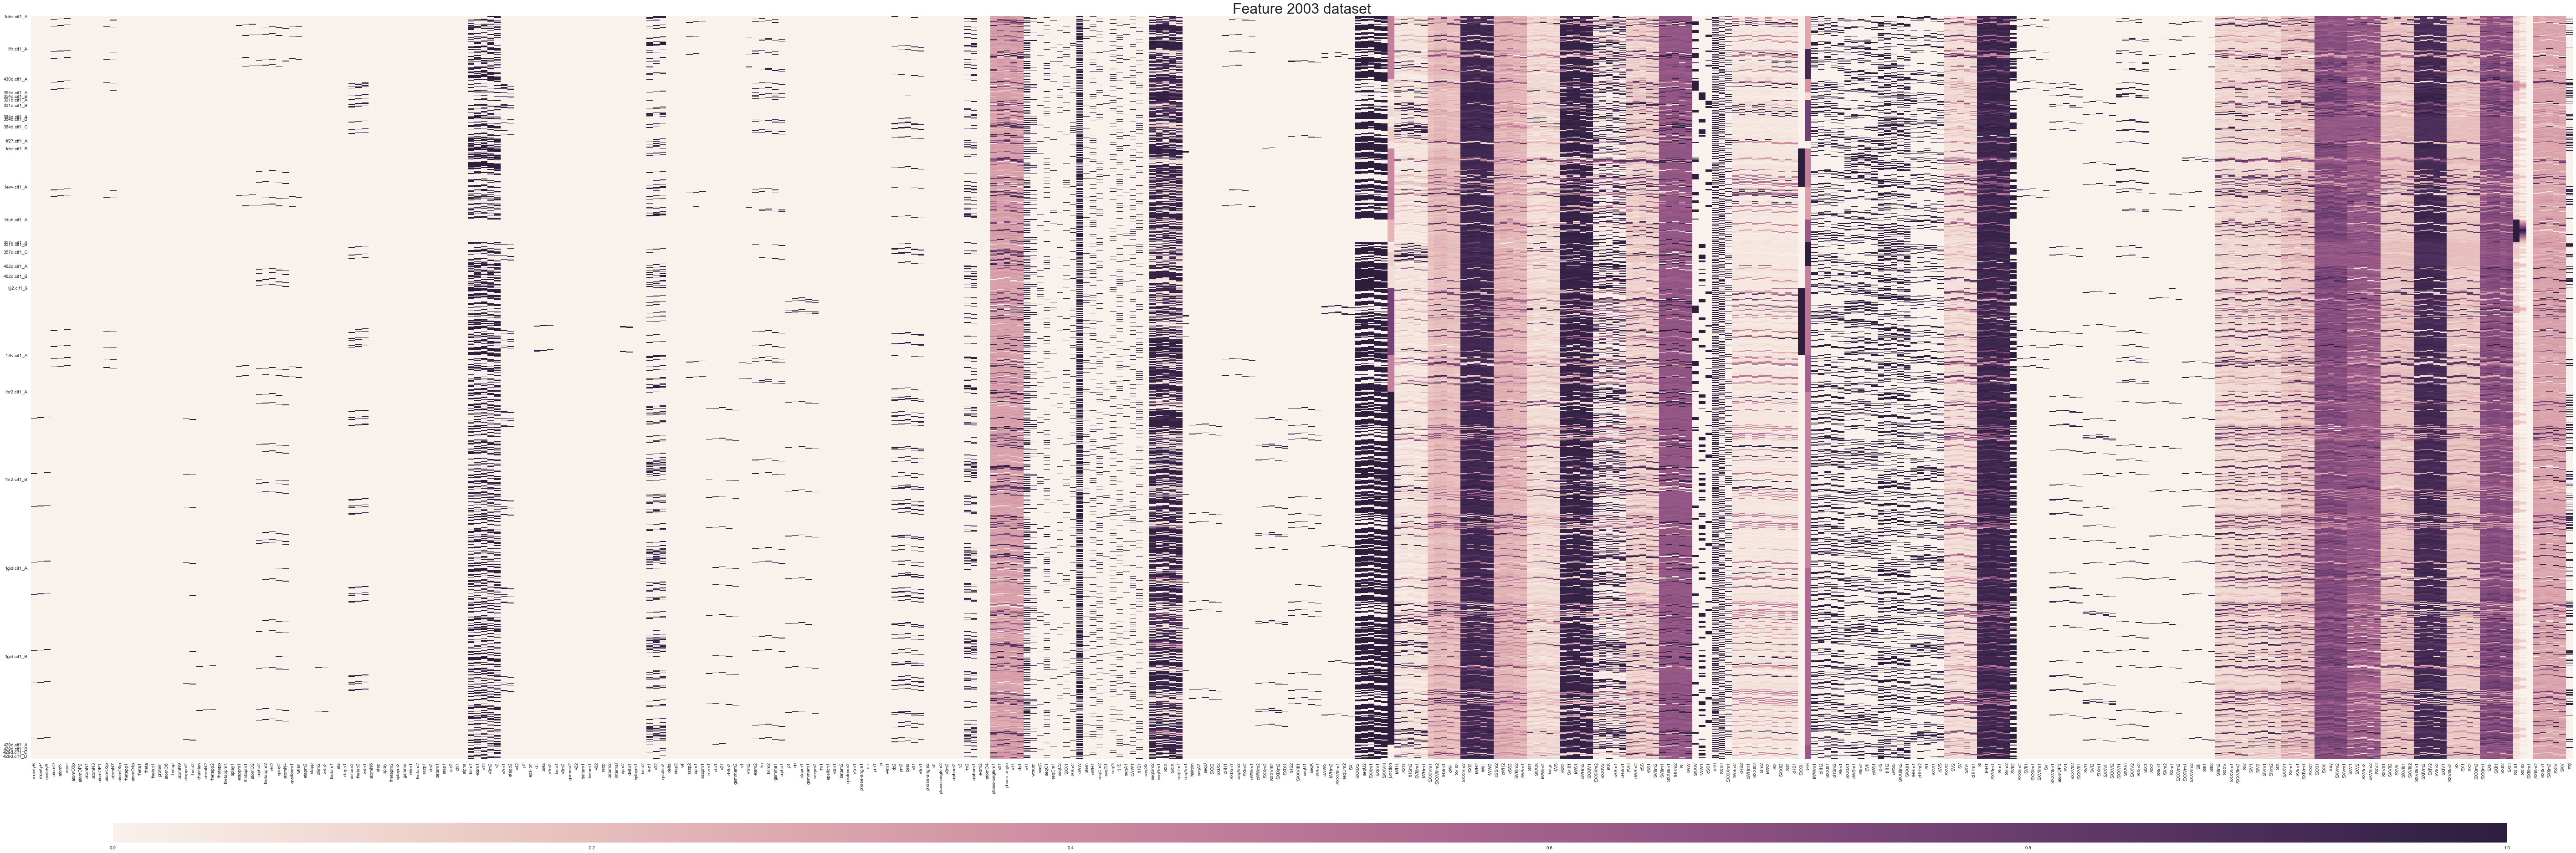

In [43]:
sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(100, 30)
plt.title('Feature 2003 dataset', fontsize=32);
plt.tick_params(axis='y', which='both', labelleft='off', labelright='on')
sns.heatmap(data_scaled, ax = ax, xticklabels=features+['mg', 'probabilities'], yticklabels=labels,
            cbar_kws={"orientation": "horizontal"}, cbar_ax = fig.add_axes([0.15, 0.04, 0.73, 0.02]) );
plt.savefig('outputs/FEATURE_dataset_heatmap.png')

In [43]:
m.data.shape

(13856, 386)

In [16]:
np.sum(dt['pdb_chain'] == '1duh.cif1_A')

0

In [15]:
dt['pdb_chain'] == '1duh.cif1_A'

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
963342    False
963343    False
963344    False
963345    False
963346    False
963347    False
963348    False
963349    False
963350    False
963351    False
963352    False
963353    False
963354    False
963355    False
963356    False
963357    False
963358    False
963359    False
963360    False
963361    False
963362    False
963363    False
963364    False
963365    False
963366    False
963367    False
963368    False
963369    False
963370    False
963371    False
Name: pdb_chain, dtype: 

In [ ]:
'1drz.cif1': ['B'],
'1duh.cif1': ['A'],
'1ehz.cif1': ['A'],
'1evv.cif1': ['A'],
'1f27.cif1': ['A','B'],
'1fir.cif1': ['A'],
'1gid.cif1': ['A','B'],
'1hr2.cif1': ['A','B'],
'1i9v.cif1': ['A'],
'1jj2.cif1': ['9'],
'301d.cif1': ['A','B'],
'354d.cif1': ['A','B'],
'357d.cif1': ['A','B','C'],
'364d.cif1': ['A','B','C'],
'429d.cif1': ['A','B','C','D'],
'430d.cif1': ['A'],
'462d.cif1': ['A','B']}